### H(z) Reconstrution via Gaussian Process (GP)

In [ ]:
"""from gaussian_process import GPReconstructionH
from plots_rec import HReconstructionPlot
from equations import FiducialModel
import numpy as np

# Load your data
data_Hz = np.loadtxt('data/Hz31.txt')
z_values = data_Hz[:, 0]
H_obs = data_Hz[:, 1]
errors = data_Hz[:, 2]

# Choose the GP parameters
kernel_par = {'input_dim': 1, 'variance': 100., 'lengthscale': 0.1}
gp_h = GPReconstructionH(z_values, H_obs, errors, kernel_par)
gp_h.optimize(num_restarts=10, verbose=False)
mean, var, mean_deriv, var_deriv = gp_h.predict()

fiducial_model = FiducialModel()

# Plot the figure
plotter = HReconstructionPlot(gp_h, fiducial_model)
plotter.plot('Figuras/H_reconstructed.png')"""

### H(z) Reconstrution via Artificial Neural Network (ANN): ReFANN code

In [ ]:
"""import refann as rf
import time
import numpy as np
import matplotlib.pyplot as plt

# Starting the ANN
start_time = time.time()

Hz = np.loadtxt('data/Hz31.txt')

rec = rf.ANN(Hz,mid_node=4096,hidden_layer=1,hp_model='rec_2')
rec.iteration = 30000
rec.train()
func = rec.predict(xpoint=np.linspace(0, 2, 201))
#func = rec.predict(xspace=(0, 2, 201)) #or use this
rec.save_func(path='data', obsName='Hz31') #save the reconstructed function

# rec.plot_loss()
rec.plot_func()
print ("Time elapsed: %.3f mins" %((time.time()-start_time)/60))
plt.show()"""

# Generating FRBs Mock data

#### DM_IGM reconstruction throught GP

In [ ]:
"""from gaussian_process import GPReconstructionDMIGM
from plots_rec import DMIGMReconstructionPlot
import numpy as np

# Parameters for generating new data mock via GP
n_new = 300  # Number of new data points
z_max = 2  # Máximo redshift
kernel_params = {'input_dim': 1, 'variance': 1., 'lengthscale': 0.2}
gp_dm_igm = GPReconstructionDMIGM(n_new, z_max, kernel_params)
gp_dm_igm.optimize(num_restarts=10, verbose=False)
new_z = gp_dm_igm.new_z
DM_IGM_sim = gp_dm_igm.DM_IGM_sim

# Plot the figures
plotter = DMIGMReconstructionPlot(gp_dm_igm, new_z, DM_IGM_sim)
plotter.plot_DM('Figuras/DM_IGM_reconstructed.png')
plotter.plot_dDM('Figuras/dDM_IGM_reconstructed.png')"""

 /home/lazarolima/.local/lib/python3.12/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1
 /home/lazarolima/.local/lib/python3.12/site-packages/GPy/kern/src/rbf.py:52: RuntimeWarning:overflow encountered in square
 /home/lazarolima/.local/lib/python3.12/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in divide
 /home/lazarolima/.local/lib/python3.12/site-packages/GPy/kern/src/rbf.py:178: RuntimeWarning:invalid value encountered in multiply


Optimization restart 1/10, f = 1514.5083073323299
Optimization restart 2/10, f = 2114.255573746672
Optimization restart 3/10, f = 1607.0919029993308
Optimization restart 4/10, f = 1579.624681558706
Optimization restart 5/10, f = 1496.731976474764
Optimization restart 6/10, f = 1456.8511254400469
Optimization restart 7/10, f = 1506.0929487845226
Optimization restart 8/10, f = 1626.430926310292
Optimization restart 9/10, f = 1842.888622665214
Optimization restart 10/10, f = 1488.2779211787017


 /home/lazarolima/cosmology_reconstruction_frb/plots_rec.py:23: UserWarning:color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.


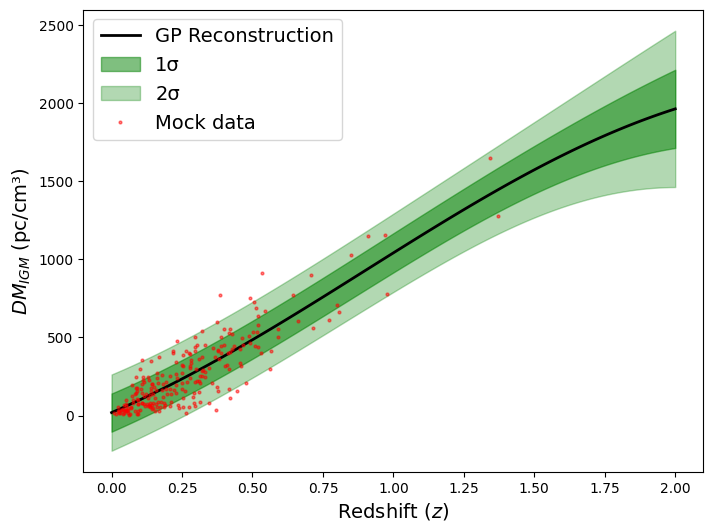

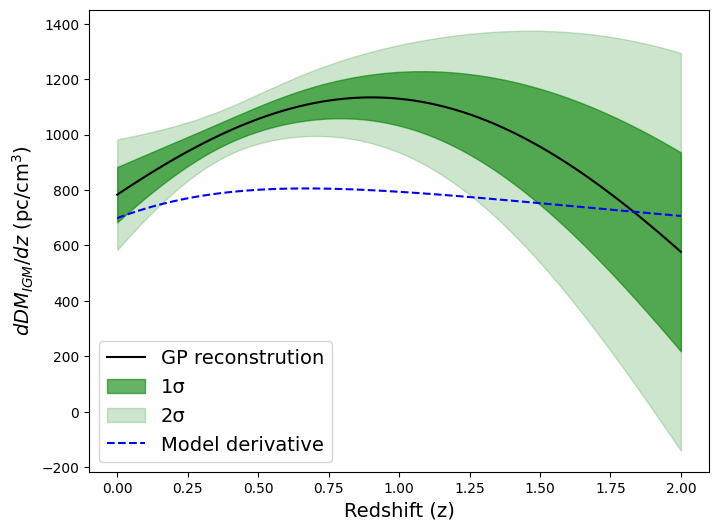

In [1]:
from gaussian_process import GPReconstructionDMIGM_noSim
from plots_rec import DMIGMReconstructionPlot
import numpy as np
import GPy

# Load your data
DM_IGM = np.loadtxt('data/DM_IGM_detected_bingo+mirror_4m_alpha=-1.5_5yrs_with_erros.txt', skiprows=1)
z = DM_IGM[:, 0]
dm = DM_IGM[:, 1]
errors = DM_IGM[:, 2]

"""kernel_params = {'input_dim': 1, 'variance': 1., 'lengthscale': 0.2}
gp_dm_igm = GPReconstructionDMIGM_noSim(z_val=z, dm_val=dm, error_val=errors, kernel_params=kernel_params)
gp_dm_igm.optimize(num_restarts=10, verbose=False)
new_z = gp_dm_igm.z_val
DM_IGM_sim = gp_dm_igm.dm_val"""

gp_dm_igm = GPReconstructionDMIGM_noSim(z, dm, errors)
gp_dm_igm.optimize(num_restarts = 10, verbose=True)
new_z = gp_dm_igm.z_val
DM_IGM_sim = gp_dm_igm.dm_val

# Plot the figures
plotter = DMIGMReconstructionPlot(gp_dm_igm, new_z, DM_IGM_sim)
plotter.plot_DM('Figuras/DM_IGM_reconstructed_bingo.png')
plotter.plot_dDM('Figuras/dDM_IGM_reconstructed_bingo.png')

#### DM_IGM reconstruction throught ANN

In [ ]:
import refann as rf
import time
import numpy as np

# Starting the ANN
start_time = time.time()

DM_IGM = np.loadtxt('data/DM_IGM_detected_bingo+mirror_4m_alpha=-1.5_5yrs_with_erros.txt', skiprows=1)

z = DM_IGM[:, 0]
dm = DM_IGM[:, 1]

rec = rf.ANN(DM_IGM,mid_node=4096,hidden_layer=1,hp_model='rec_2')
rec.iteration = 30000
rec.train()
func = rec.predict(xpoint=np.linspace(0, 2, 201))
#func = rec.predict(xspace=(0, 2, 201)) #or use this
rec.save_func(path='data', obsName='DM_IGM_bingo') #save the reconstructed function

print ("Time elapsed: %.3f mins" %((time.time()-start_time)/60))

In [ ]:
import matplotlib.pyplot as plt

# Chame a função original
rec.plot_func()

plt.xlabel('Redshift ($z$)', fontsize=14)
plt.ylabel('$DM_{IGM}$ (pc/cm³)', fontsize=14)
plt.legend(['ANN reconstruction', '1$\\sigma$', 'Mock data'], fontsize=12)
plt.draw()
plt.savefig('Figuras/ANN_reconstruction.png', dpi=600)
plt.show()

In [ ]:
from equations import derivative_ann
import matplotlib.pyplot as plt

# Using the dDM_IGM(z)/dz reconstructed via ANN (ReFANN)
derivative = derivative_ann()
deriv = derivative.deriv_ann()
z_ann = deriv[:,0] 
deriv_ann = deriv[:,1]

plt.plot(z_ann, deriv_ann, 'k', label=r'$\rm Predicted\ f(x)$', lw=2)
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.legend(fontsize=16)

# Bayesian analyses and MCMC

### Defining priors

In [ ]:
from likelihood import Priors, LikelihoodFunction
from equations import H_Model

model = H_Model()

# Defining the prior intervals manually
intervals_constant = [(0, 1)]  # Interval for $f_{IGM}$
intervals_p2 = [(0, 1), (0, 5)]  # Intervals for $f_{IGM}$ and $\alpha$
intervals_p3 = [(0, 1), (0, 5)]  # Intervals for $f_{IGM}$ and $\alpha$
intervals_p4 = [(0, 1), (-5, 5)]  # Intervals for $f_{IGM}$ and $s$

# Creating specific instances of the priors
P_constant = Priors(['$f_{IGM}$'], intervals_constant)
P_p2 = Priors(['$f_{IGM}$', '$\\alpha$'], intervals_p2)
P_p3 = Priors(['$f_{IGM}$', '$\\alpha$'], intervals_p3)
P_p4 = Priors(['$f_{IGM}$', '$s$'], intervals_p4)

# Creating an instance of the likelihood model
deriv_type = 'ANN'
LF_constant = LikelihoodFunction(lambda z, f_IGM: model.H_p(z, f_IGM, None, 'constant', deriv_type))
LF_p2 = LikelihoodFunction(lambda z, f_IGM, alpha: model.H_p(z, f_IGM, alpha, 'p2', deriv_type))
LF_p3 = LikelihoodFunction(lambda z, f_IGM, alpha: model.H_p(z, f_IGM, alpha, 'p3', deriv_type))
LF_p4 = LikelihoodFunction(lambda z, f_IGM, s: model.H_p(z, f_IGM, s, 'p4', deriv_type))
"""LF_constant = LikelihoodFunction(lambda z, f_IGM: model.H_p(z, f_IGM, None, 'constant'))
LF_p2 = LikelihoodFunction(lambda z, f_IGM, alpha: model.H_p(z, f_IGM, alpha, 'p2'))
LF_p3 = LikelihoodFunction(lambda z, f_IGM, alpha: model.H_p(z, f_IGM, alpha, 'p3'))
LF_p4 = LikelihoodFunction(lambda z, f_IGM, s: model.H_p(z, f_IGM, s, 'p4'))"""

### Preparing the samples

In [10]:
from obs_data import H_data
import ultranest

z_values = H_data.z_func()
H_obs = H_data.H_func()
errors = H_data.errors_func()
model = H_Model()

# Configuring the ultranest samplers
sampler_constant = ultranest.ReactiveNestedSampler(P_constant.param_names,
    lambda params: LF_constant.log_likelihood(params, z_values, H_obs, errors), P_constant.prior_transform)

sampler_p2 = ultranest.ReactiveNestedSampler(P_p2.param_names,
    lambda params: LF_p2.log_likelihood(params, z_values, H_obs, errors), P_p2.prior_transform)

sampler_p3 = ultranest.ReactiveNestedSampler(P_p3.param_names,
    lambda params: LF_p3.log_likelihood(params, z_values, H_obs, errors), P_p3.prior_transform)

sampler_p4 = ultranest.ReactiveNestedSampler(P_p4.param_names,
    lambda params: LF_p4.log_likelihood(params, z_values, H_obs, errors), P_p4.prior_transform)


In [ ]:
result1 = sampler_constant.run(min_num_live_points=400)
sampler_constant.print_results()

In [ ]:
result2 = sampler_p2.run(min_num_live_points=400)
sampler_p2.print_results()

In [ ]:
result3 = sampler_p3.run(min_num_live_points=400)
sampler_p3.print_results()

In [ ]:
result4 = sampler_p4.run(min_num_live_points=400)
sampler_p4.print_results()

In [ ]:
from getdist import plots, MCSamples

# Extraindo amostras dos resultados
samples1 = result1['samples']
samples2 = result2['samples']
samples3 = result3['samples']
samples4 = result4['samples']

# Criando objetos MCSamples com os dados
labels1 = ['f_{IGM,0}']
names1 = ['f_IGM']
mcsamples1 = MCSamples(samples=samples1, names=names1, labels=labels1)

labels2 = ['f_{IGM,0}', '\\alpha']
names2 = ['f_IGM', 'alpha']
mcsamples2 = MCSamples(samples=samples2, names=names2, labels=labels2)
mcsamples3 = MCSamples(samples=samples3, names=names2, labels=labels2)

labels3 = ['f_{IGM,0}', 's']
names3 = ['f_IGM', 's']
mcsamples4 = MCSamples(samples=samples4, names=names3, labels=labels3)

In [ ]:
# Plotando os Triangle plots
g = plots.get_subplot_plotter()
mcsamples1.updateSettings({'smooth_scale_2D': 0.9, 'smooth_scale_1D': 0.9})
g.settings.num_plot_contours = 2
g.triangle_plot(mcsamples1, filled=True, contour_colors=['green'], 
                legend_labels=['P. 1'], 
                title_limit=1)
g.export('Figuras/H_p1.png', dpi=600)

In [ ]:
# Plotando os Triangle plots
g = plots.get_subplot_plotter()
mcsamples2.updateSettings({'smooth_scale_2D': 0.9, 'smooth_scale_1D': 0.9})
g.settings.num_plot_contours = 2
g.triangle_plot(mcsamples2, filled=True, contour_colors=['red'],
                legend_labels=['P. 2'], title_limit=1)
g.export('Figuras/H_p2.png', dpi=600)

In [ ]:
# Plotando os Triangle plots
g = plots.get_subplot_plotter()
mcsamples3.updateSettings({'smooth_scale_2D': 0.9, 'smooth_scale_1D': 0.9})
g.settings.num_plot_contours = 2
g.triangle_plot(mcsamples3, filled=True, contour_colors=['blue'],
                legend_labels=['P. 3'], title_limit=1)
g.export('Figuras/H_p3.png', dpi=600)

In [ ]:
# Plotando os Triangle plots
g = plots.get_subplot_plotter()
mcsamples4.updateSettings({'smooth_scale_2D': 0.9, 'smooth_scale_1D': 0.9})
g.settings.num_plot_contours = 2
g.triangle_plot(mcsamples4, filled=True, contour_colors=['purple'],
                legend_labels=['P. 4'], title_limit=1)
g.export('Figuras/H_p4.png', dpi=600)

In [ ]:
from ultranest.plot import PredictionBand
from equations import H_Model
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
plt.xlabel('$z$')
plt.ylabel('$H(z)$')
plt.errorbar(x=z_values, y=H_obs, yerr=errors, marker='o', alpha=0.6, capsize=3, ls=' ', color='red', label='Data', ms=4)

z_test = np.linspace(0, 2, 100)

band = PredictionBand(z_test)
model = H_Model()
# go through the solutions
for f_IGM, alpha  in sampler_p3.results['samples']:
    # compute for each time the y value
    band.add(model.H_p(z_test, f_IGM, alpha, 'p3', 'ANN'))

band.line(color='k', linestyle='-', label='Parameterization 3', linewidth=1.5)
# add 1 sigma quantile
band.shade(color='green', alpha=0.3)
# add wider quantile (0.01 .. 0.99)
band.shade(q=0.49, color='green', alpha=0.2)

plt.legend()
plt.savefig('Figuras/H_bestfit.png', format='png', dpi=600)